## Initial Code with No changes

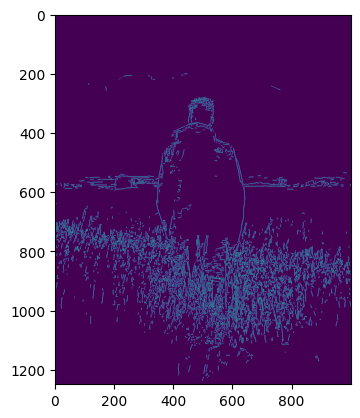

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

# Load image
img = cv.imread('imgg.jpg')

def canny_initial(image):
  # Set high and low threshold ratios
  highThresholdRatio = 0.15
  lowThresholdRatio = 0.1


  # Convert to grayscale
  img = cv.cvtColor(np.float32(image), cv.COLOR_BGR2GRAY)

  # Apply Gaussian filter
  img_smooth = cv.GaussianBlur(img, (5,5), 1)



  # Calculate gradient magnitude and direction
  sobel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
  sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
  Gx = cv.filter2D(src=img_smooth, kernel=sobel_x, ddepth=-1)
  Gy = cv.filter2D(src=img_smooth, kernel=sobel_y, ddepth=-1)
  #Gx = cv.Sobel(img_smooth, cv.CV_64F, 1, 0, ksize=3)
  #Gy = cv.Sobel(img_smooth, cv.CV_64F, 0, 1, ksize=3)
  gradient_mag = np.sqrt(Gx**2 + Gy**2)
  gradient_dir = np.arctan2(Gy, Gx) * 180 / np.pi

  # Non-maximum suppression
  M, N = img.shape
  nms = np.zeros((M, N), dtype=np.int32)
  for i in range(1, M-1):
      for j in range(1, N-1):
          dir = gradient_dir[i, j]
          if dir < 0:
              dir += 180
          dir_round = int((dir + 22.5) / 45) % 4
          if dir_round == 0:  # East-West (horizontal)
              if (gradient_mag[i, j] > gradient_mag[i, j-1]) and (gradient_mag[i, j] > gradient_mag[i, j+1]):
                  nms[i, j] = gradient_mag[i, j]
          elif dir_round == 1:  # North-East/South-West
              if (gradient_mag[i, j] > gradient_mag[i-1, j+1]) and (gradient_mag[i, j] > gradient_mag[i+1, j-1]):
                  nms[i, j] = gradient_mag[i, j]
          elif dir_round == 2:  # North-South (vertical)
              if (gradient_mag[i, j] > gradient_mag[i-1, j]) and (gradient_mag[i, j] > gradient_mag[i+1, j]):
                  nms[i, j] = gradient_mag[i, j]
          elif dir_round == 3:  # North-West/South-East
              if (gradient_mag[i, j] > gradient_mag[i-1, j-1]) and (gradient_mag[i, j] > gradient_mag[i+1, j+1]):
                  nms[i, j] = gradient_mag[i, j]

  # Hysteresis thresholding
  high_threshold = np.max(nms) * highThresholdRatio
  low_threshold = high_threshold * lowThresholdRatio
  strong_edges = nms > high_threshold
  weak_edges = (nms > low_threshold) & (nms < high_threshold)
  for i in range(1, M-1):
      for j in range(1, N-1):
          if weak_edges[i, j]:
              if strong_edges[i-1:i+2, j-1:j+2].any():
                  strong_edges[i, j] = True
                  weak_edges[i, j] = False

  # Display edges
  plt.imshow(strong_edges)

canny_initial(img)

## Applying MedianBlur Filter & Alternative Sobel Filter along with change in threshold values

---



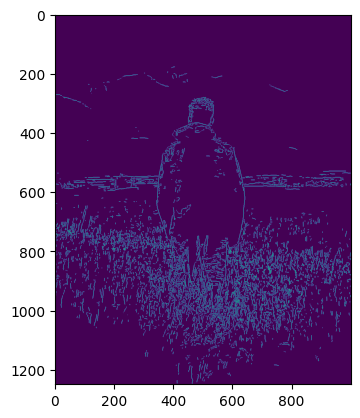

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

def canny1(image):
    # Set high and low threshold ratios
    highThresholdRatio = 0.09
    lowThresholdRatio = 0.06


    # Convert to grayscale
    img = cv.cvtColor(np.float32(image), cv.COLOR_BGR2GRAY)

    # applying Median blur
    img_smooth = cv.medianBlur(img, 5)


    # Calculate gradient magnitude and direction
    sobel_x = np.array([[3, 0, -3], [10, 0, -10], [3, 0, -3]]) # alternate sobel operator for h'(x)
    sobel_y = np.array([[3, 10, 3], [0, 0, 0], [-3, -10, -3]]) # alternate sobel operator for h'(y)
    Gx = cv.filter2D(src=img_smooth, kernel=sobel_x, ddepth=-1)
    Gy = cv.filter2D(src=img_smooth, kernel=sobel_y, ddepth=-1)
    #Gx = cv.Sobel(img_smooth, cv.CV_64F, 1, 0, ksize=3)
    #Gy = cv.Sobel(img_smooth, cv.CV_64F, 0, 1, ksize=3)
    gradient_mag = np.sqrt(Gx**2 + Gy**2)
    gradient_dir = np.arctan2(Gy, Gx) * 180 / np.pi

    # Non-maximum suppression
    M, N = img.shape
    nms = np.zeros((M, N), dtype=np.int32)
    for i in range(1, M-1):
        for j in range(1, N-1):
            dir = gradient_dir[i, j]
            if dir < 0:
                dir += 180
            dir_round = int((dir + 22.5) / 45) % 4
            if dir_round == 0:  # East-West (horizontal)
                if (gradient_mag[i, j] > gradient_mag[i, j-1]) and (gradient_mag[i, j] > gradient_mag[i, j+1]):
                    nms[i, j] = gradient_mag[i, j]
            elif dir_round == 1:  # North-East/South-West
                if (gradient_mag[i, j] > gradient_mag[i-1, j+1]) and (gradient_mag[i, j] > gradient_mag[i+1, j-1]):
                    nms[i, j] = gradient_mag[i, j]
            elif dir_round == 2:  # North-South (vertical)
                if (gradient_mag[i, j] > gradient_mag[i-1, j]) and (gradient_mag[i, j] > gradient_mag[i+1, j]):
                    nms[i, j] = gradient_mag[i, j]
            elif dir_round == 3:  # North-West/South-East
                if (gradient_mag[i, j] > gradient_mag[i-1, j-1]) and (gradient_mag[i, j] > gradient_mag[i+1, j+1]):
                    nms[i, j] = gradient_mag[i, j]

    # Hysteresis thresholding
    high_threshold = np.max(nms) * highThresholdRatio
    low_threshold = high_threshold * lowThresholdRatio
    strong_edges = nms > high_threshold
    weak_edges = (nms > low_threshold) & (nms < high_threshold)
    for i in range(1, M-1):
        for j in range(1, N-1):
            if weak_edges[i, j]:
                if strong_edges[i-1:i+2, j-1:j+2].any():
                    strong_edges[i, j] = True
                    weak_edges[i, j] = False

    # Display edges
    plt.imshow(strong_edges)
    
canny1(img)

 In the above peice of code, I have changed the filter to **MedianBlur Filter**.The median filter run through each element of the signal (in this case the image) and replace each pixel with the median of its neighboring pixels (located in a square neighborhood around the evaluated pixel). It can be clearly seen from the output, This is highly effective against salt-and-pepper noise in an image.

The Sobel operator is a commonly used technique for edge detection in image processing. It is a gradient-based method that calculates the intensity gradients in the x and y directions of an image, and uses these gradients to identify edges.

An alternative Sobel operator can refer to any modification made to the original Sobel operator to enhance its performance in certain applications. Some advantages of using alternative Sobel operators in this example include:

1. Better noise reduction

2. Improved edge localization: The alternative Sobel operator may be designed to enhance edge localization by emphasizing the edges in a particular direction or by increasing the sharpness of the edges.

3. Faster processing time: In some cases, alternative Sobel operators can be more computationally efficient than the original Sobel operator, allowing for faster processing times.

4. More robust to lighting conditions

## Applying BilateralFilter & Alternative Sobel operator along with changes in threshold values

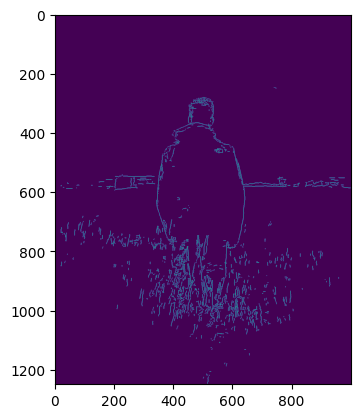

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

def canny2(image):
    # Set high and low threshold ratios
    highThresholdRatio = 0.1
    lowThresholdRatio = 0.04


    # Load image
    img = cv.imread('Lenna.png')

    # Convert to grayscale
    img = cv.cvtColor(np.float32(image), cv.COLOR_BGR2GRAY)

    # applying Bilateral Filter
    img_smooth = cv.bilateralFilter(img,9,75,75)
    #blur = cv.bilateralFilter(img,9,75,75)


    # Calculate gradient magnitude and direction
    sobel_x = np.array([[3, 0, -3], [10, 0, -10], [3, 0, -3]]) # alternate sobel operator for h'(x)
    sobel_y = np.array([[3, 10, 3], [0, 0, 0], [-3, -10, -3]]) # alternate sobel operator for h'(y)
    Gx = cv.filter2D(src=img_smooth, kernel=sobel_x, ddepth=-1)
    Gy = cv.filter2D(src=img_smooth, kernel=sobel_y, ddepth=-1)
    #Gx = cv.Sobel(img_smooth, cv.CV_64F, 1, 0, ksize=3)
    #Gy = cv.Sobel(img_smooth, cv.CV_64F, 0, 1, ksize=3)
    gradient_mag = np.sqrt(Gx**2 + Gy**2)
    gradient_dir = np.arctan2(Gy, Gx) * 180 / np.pi

    # Non-maximum suppression
    M, N = img.shape
    nms = np.zeros((M, N), dtype=np.int32)
    for i in range(1, M-1):
        for j in range(1, N-1):
            dir = gradient_dir[i, j]
            if dir < 0:
                dir += 180
            dir_round = int((dir + 22.5) / 45) % 4
            if dir_round == 0:  # East-West (horizontal)
                if (gradient_mag[i, j] > gradient_mag[i, j-1]) and (gradient_mag[i, j] > gradient_mag[i, j+1]):
                    nms[i, j] = gradient_mag[i, j]
            elif dir_round == 1:  # North-East/South-West
                if (gradient_mag[i, j] > gradient_mag[i-1, j+1]) and (gradient_mag[i, j] > gradient_mag[i+1, j-1]):
                    nms[i, j] = gradient_mag[i, j]
            elif dir_round == 2:  # North-South (vertical)
                if (gradient_mag[i, j] > gradient_mag[i-1, j]) and (gradient_mag[i, j] > gradient_mag[i+1, j]):
                    nms[i, j] = gradient_mag[i, j]
            elif dir_round == 3:  # North-West/South-East
                if (gradient_mag[i, j] > gradient_mag[i-1, j-1]) and (gradient_mag[i, j] > gradient_mag[i+1, j+1]):
                    nms[i, j] = gradient_mag[i, j]

    # Hysteresis thresholding
    high_threshold = np.max(nms) * highThresholdRatio
    low_threshold = high_threshold * lowThresholdRatio
    strong_edges = nms > high_threshold
    weak_edges = (nms > low_threshold) & (nms < high_threshold)
    for i in range(1, M-1):
        for j in range(1, N-1):
            if weak_edges[i, j]:
                if strong_edges[i-1:i+2, j-1:j+2].any():
                    strong_edges[i, j] = True
                    weak_edges[i, j] = False

    # Display edges
    plt.imshow(strong_edges)
canny2(img)

**Bilateral filtering** is a type of smoothing technique that preserves edges by smoothing only the areas around the edges while leaving the edges themselves intact. This is achieved by applying a Gaussian filter to the image, but with the difference that the weighting of the filter is based not only on the spatial distance between pixels but also on the difference in pixel intensities. The bilateral filter effectively smooths only the pixels that are similar in intensity while preserving edges with significant changes in intensity. The improvement can be seen from the output, its is less noisy and has less unwanted edges.
The alternative Sobel operator is the same and so is the threshold values.

# NOTE: I did play around with different threshold values and I guess the one now mentioned in the code rightnow is the most optimal one.

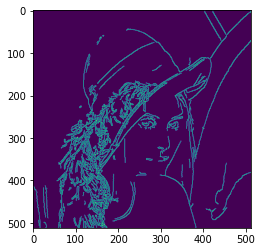

In [ ]:
# Opencv Canny
img = cv.imread('Lenna.png', 0)
edges = edges = cv.Canny(img,100,200)
plt.imshow(edges)

The output of the canny edge detection using open cv is still way better but major improvement were seen in the above code where I changed the filter and the other parameters.